<a href="https://colab.research.google.com/github/Ronilmuchandi/economics-of-remote-work-city-opportunity/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load final dataset (single source of truth)
df = pd.read_csv("/content/drive/MyDrive/master_msa_dataset_final.csv")

print("Shape (rows, cols):", df.shape)
df.head(5)



Shape (rows, cols): (209, 32)


,msa_a_code,year_month,total_jobs,remote_jobs,remote_share,msa_city,msa_state,total_inflow,total_outflow,net_migration,...,median_family_income,housing_cost.1,food_cost.1,transportation_cost.1,healthcare_cost.1,other_necessities_cost.1,childcare_cost.1,taxes.1,total_cost.1,median_family_income.1
0,10180,2024-04-01,60,3,0.050000,Abilene,TX,15289,12714,1360,...,65228.097656,7518.818080,3001.86972,10906.385000,5389.47984,3812.060080,0.0,4570.41932,35199.03240,65466.664062
1,10420,2024-04-01,124,7,0.056452,Akron,OH,31107,29891,-826,...,77102.312500,6882.068460,3211.10118,9639.235140,4309.34988,3657.153420,0.0,4479.25284,32178.16080,77387.769531
2,10500,2024-04-01,14,3,0.214286,Albany,GA,7915,8209,-725,...,52946.230469,7010.840112,3187.23852,11002.865592,5149.47984,3695.166096,0.0,5788.54968,35834.14056,55871.042969
3,10740,2024-04-01,219,3,0.013699,Albuquerque,NM,36377,36067,-3958,...,69691.710938,7505.500860,3221.47662,10579.807590,3476.37996,3886.807080,0.0,4870.98342,33540.95610,63474.537109
4,10780,2024-04-01,39,1,0.025641,Alexandria,LA,7257,6345,361,...,53466.832031,6141.242400,3081.41208,11032.943460,5545.47984,3341.731560,0.0,5138.70414,34281.51240,56290.089844


In [6]:
# Column list
print("COLUMNS:")
for c in df.columns:
    print(c)

print("\nDATA TYPES:")
df.dtypes.sort_values()


COLUMNS:
msa_a_code
year_month
total_jobs
remote_jobs
remote_share
msa_city
msa_state
total_inflow
total_outflow
net_migration
gross_migration
city_state
msa_city.1
msa_state.1
housing_cost
food_cost
transportation_cost
healthcare_cost
other_necessities_cost
childcare_cost
taxes
total_cost
median_family_income
housing_cost.1
food_cost.1
transportation_cost.1
healthcare_cost.1
other_necessities_cost.1
childcare_cost.1
taxes.1
total_cost.1
median_family_income.1

DATA TYPES:


,0
msa_a_code,int64
gross_migration,int64
net_migration,int64
total_inflow,int64
total_outflow,int64
remote_jobs,int64
total_jobs,int64
other_necessities_cost.1,float64
healthcare_cost.1,float64
taxes,float64


In [7]:
# Define the canonical columns to use for EDA
eda_cols = [
    # identifiers
    "msa_a_code",
    "city_state",
    "year_month",

    # job demand
    "total_jobs",
    "remote_jobs",
    "remote_share",

    # migration
    "total_inflow",
    "total_outflow",
    "net_migration",
    "gross_migration",

    # cost of living (use NON .1 versions)
    "housing_cost",
    "food_cost",
    "transportation_cost",
    "healthcare_cost",
    "other_necessities_cost",
    "childcare_cost",
    "taxes",
    "total_cost",
    "median_family_income"
]

# Create EDA view (no mutation of original df)
eda = df[eda_cols].copy()

print("EDA shape:", eda.shape)
eda.head(5)


EDA shape: (209, 19)


,msa_a_code,city_state,year_month,total_jobs,remote_jobs,remote_share,total_inflow,total_outflow,net_migration,gross_migration,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,10180,"abilene, tx",2024-04-01,60,3,0.050000,15289,12714,1360,26788,7100.93256,2977.66092,11279.66604,5389.47984,3651.87192,0.0,4524.73644,34924.3476,65228.097656
1,10420,"akron, oh",2024-04-01,124,7,0.056452,31107,29891,-826,58956,7033.36740,3164.41296,10078.66848,4309.34988,3695.05812,0.0,4613.72640,32894.5836,77102.312500
2,10500,"albany, ga",2024-04-01,14,3,0.214286,7915,8209,-725,15693,5137.94424,3164.41296,11873.94576,5149.47984,3008.27148,0.0,5343.16812,33677.2236,52946.230469
3,10740,"albuquerque, nm",2024-04-01,219,3,0.013699,36377,36067,-3958,68176,7246.40484,3216.28896,9040.54464,3476.37996,3791.04636,0.0,4374.73248,31145.3964,69691.710938
4,10780,"alexandria, la",2024-04-01,39,1,0.025641,7257,6345,361,13051,5713.15572,3226.66368,11461.00560,5545.47984,3239.24928,0.0,5148.80460,34334.3580,53466.832031


In [8]:
# Parse year_month
eda["year_month"] = pd.to_datetime(eda["year_month"], errors="coerce")

# Check for bad dates
bad_dates = eda["year_month"].isna().sum()
print("Bad year_month rows:", bad_dates)

# Enforce 1 row = 1 MSA × month
dup_count = eda.duplicated(subset=["city_state", "year_month"]).sum()
print("Duplicate (city_state, year_month) rows:", dup_count)

if dup_count > 0:
    display(
        eda[eda.duplicated(subset=["city_state", "year_month"], keep=False)]
        .sort_values(["city_state", "year_month"])
    )
    raise ValueError("Violation: not 1 row per MSA × month")

print("✅ Time + uniqueness checks passed")


Bad year_month rows: 0
Duplicate (city_state, year_month) rows: 0
✅ Time + uniqueness checks passed


In [9]:
# Missingness percentage per column
missing_pct = eda.isna().mean().sort_values(ascending=False)
print("Missingness (fraction):")
print(missing_pct)

# Basic numeric sanity checks
checks = {
    "total_jobs >= 0": (eda["total_jobs"] >= 0).all(),
    "remote_jobs >= 0": (eda["remote_jobs"] >= 0).all(),
    "remote_jobs <= total_jobs": (eda["remote_jobs"] <= eda["total_jobs"]).all(),
    "remote_share in [0,1]": ((eda["remote_share"] >= 0) & (eda["remote_share"] <= 1)).all(),
    "housing_cost >= 0": (eda["housing_cost"] >= 0).all(),
    "total_cost >= housing_cost": (eda["total_cost"] >= eda["housing_cost"]).all()
}

print("\nSanity checks:")
for k, v in checks.items():
    print(f"{k}: {v}")

# Show rows with any NA (if they exist)
na_rows = eda[eda.isna().any(axis=1)]
print("\nRows with any NA:", na_rows.shape[0])
if na_rows.shape[0] > 0:
    display(na_rows.head(10))


Missingness (fraction):
taxes                     0.334928
total_cost                0.334928
housing_cost              0.334928
median_family_income      0.334928
healthcare_cost           0.334928
transportation_cost       0.334928
childcare_cost            0.334928
other_necessities_cost    0.334928
food_cost                 0.334928
msa_a_code                0.000000
city_state                0.000000
year_month                0.000000
gross_migration           0.000000
total_outflow             0.000000
net_migration             0.000000
remote_jobs               0.000000
remote_share              0.000000
total_jobs                0.000000
total_inflow              0.000000
dtype: float64

Sanity checks:
total_jobs >= 0: True
remote_jobs >= 0: True
remote_jobs <= total_jobs: True
remote_share in [0,1]: True
housing_cost >= 0: False
total_cost >= housing_cost: False

Rows with any NA: 70


,msa_a_code,city_state,year_month,total_jobs,remote_jobs,remote_share,total_inflow,total_outflow,net_migration,gross_migration,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
6,11100,"amarillo, tx",2024-04-01,33,1,0.030303,12705,15075,-3107,27043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11260,"anchorage, ak",2024-04-01,112,5,0.044643,22938,27239,-7192,47286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11700,"asheville, nc",2024-04-01,117,3,0.025641,24071,19866,2649,42381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,12620,"bangor, me",2024-04-01,22,2,0.090909,9701,7609,1589,16807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,12940,"baton rouge, la",2024-04-01,106,5,0.047170,31617,28172,1056,57400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,13220,"beckley, wv",2024-04-01,6,1,0.166667,4354,5055,-909,9201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,13460,"bend, or",2024-04-01,31,3,0.096774,15956,11774,2997,26545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,13740,"billings, mt",2024-04-01,49,3,0.061224,9008,9656,-991,18321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,13900,"bismarck, nd",2024-04-01,32,3,0.093750,6506,5990,-20,11960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,14010,"bloomington, il",2024-04-01,20,1,0.050000,12491,10729,1059,22517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


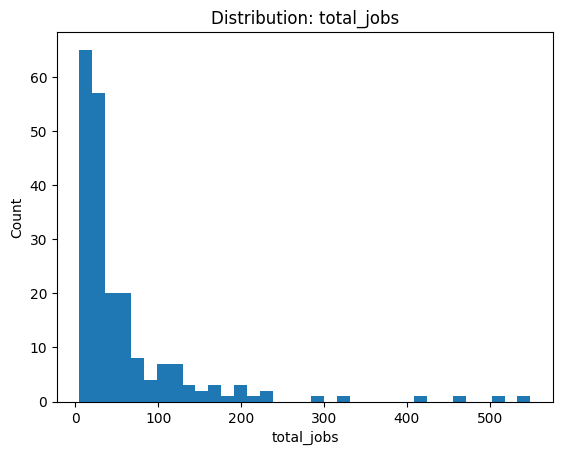

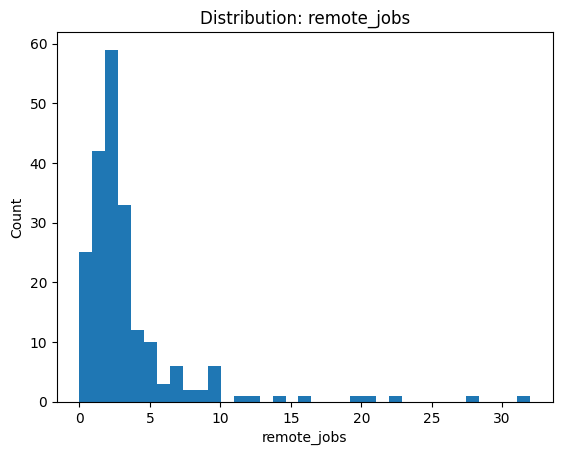

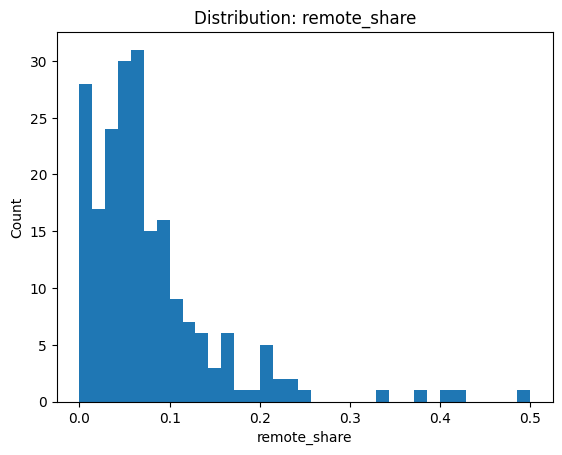

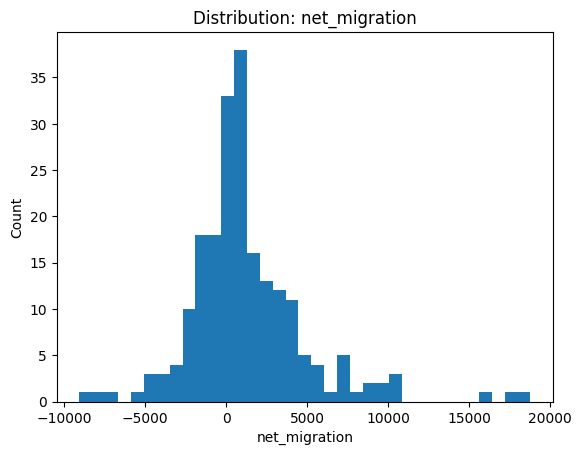

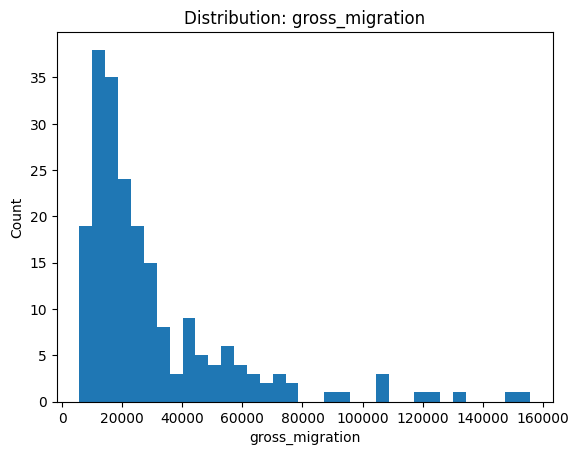

In [10]:
import matplotlib.pyplot as plt

core_cols = [
    "total_jobs",
    "remote_jobs",
    "remote_share",
    "net_migration",
    "gross_migration"
]

for col in core_cols:
    plt.figure()
    plt.hist(eda[col], bins=35)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Rows with cost data: 139


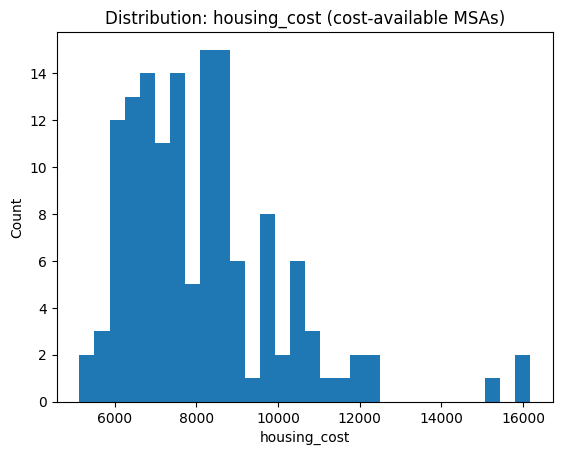

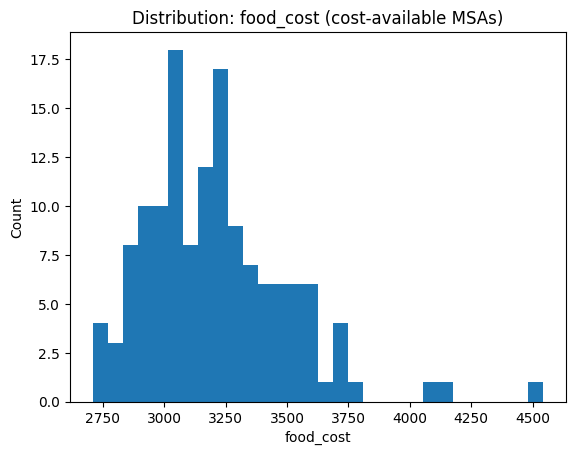

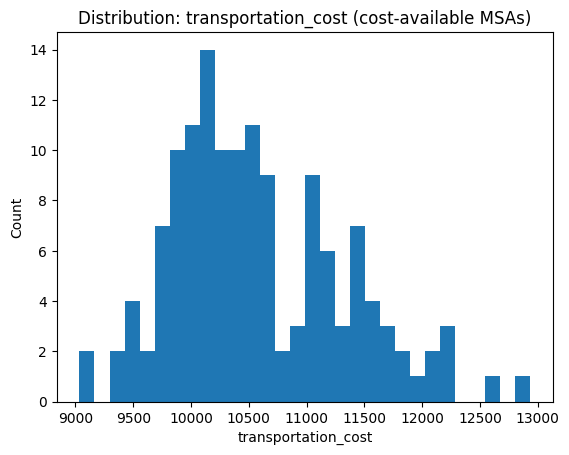

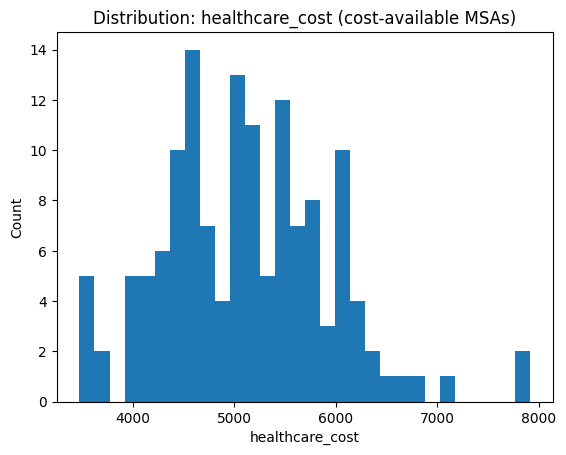

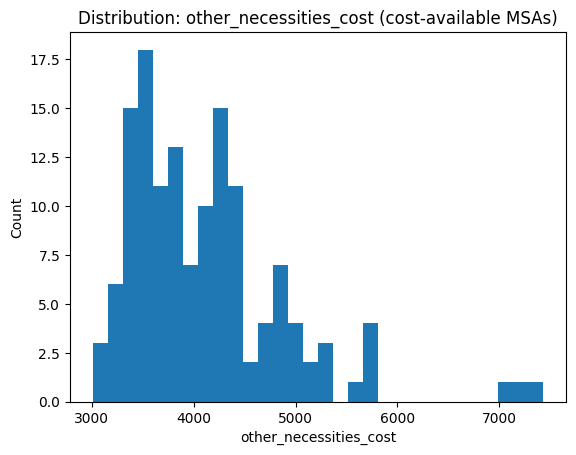

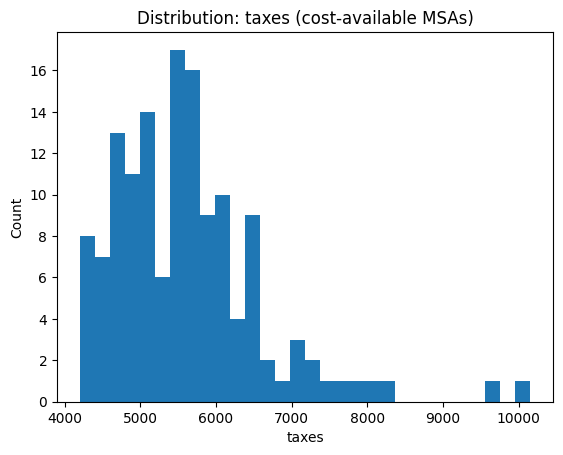

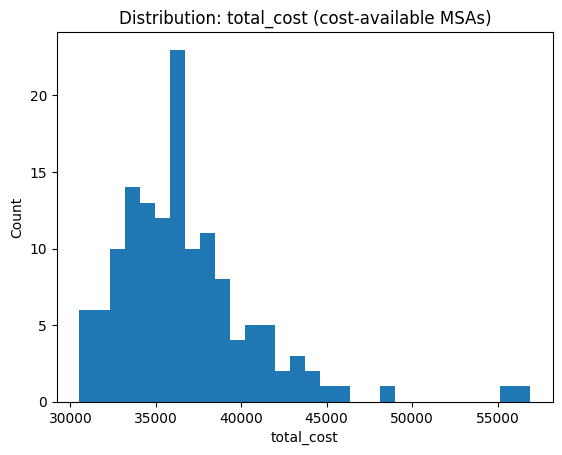

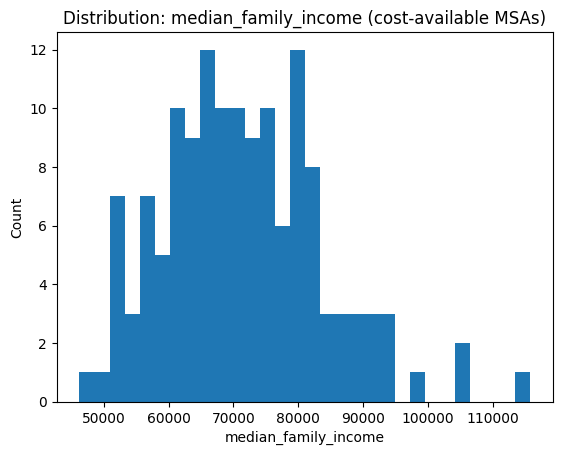

In [11]:
# Subset: MSAs with cost data
cost_df = eda.dropna(subset=["total_cost"])

print("Rows with cost data:", cost_df.shape[0])

cost_cols = [
    "housing_cost",
    "food_cost",
    "transportation_cost",
    "healthcare_cost",
    "other_necessities_cost",
    "taxes",
    "total_cost",
    "median_family_income"
]

for col in cost_cols:
    plt.figure()
    plt.hist(cost_df[col], bins=30)
    plt.title(f"Distribution: {col} (cost-available MSAs)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


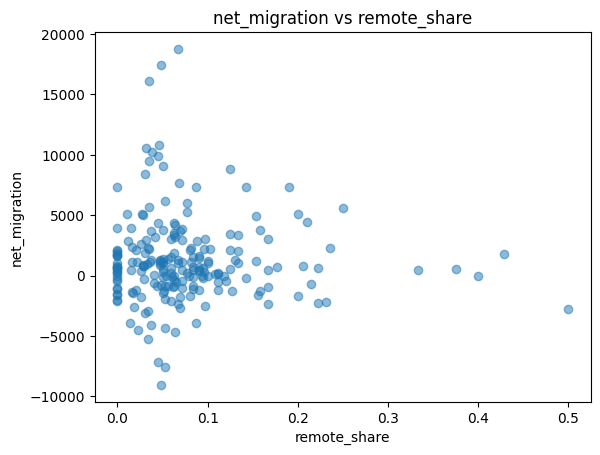

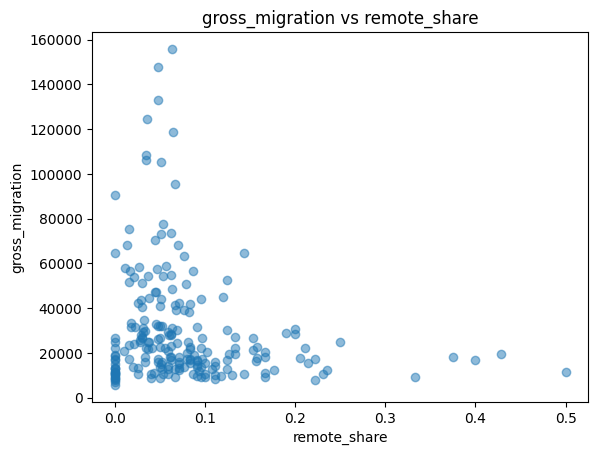

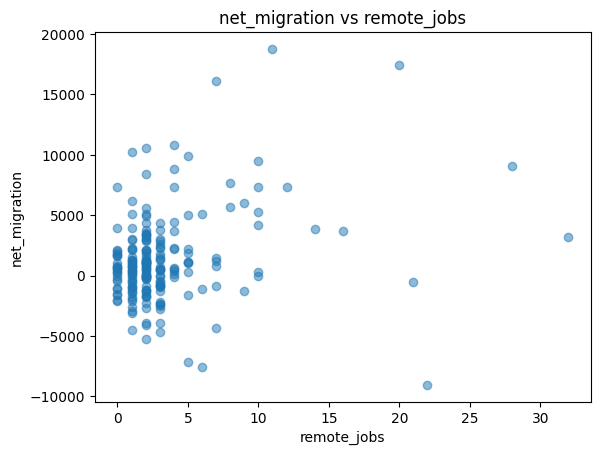

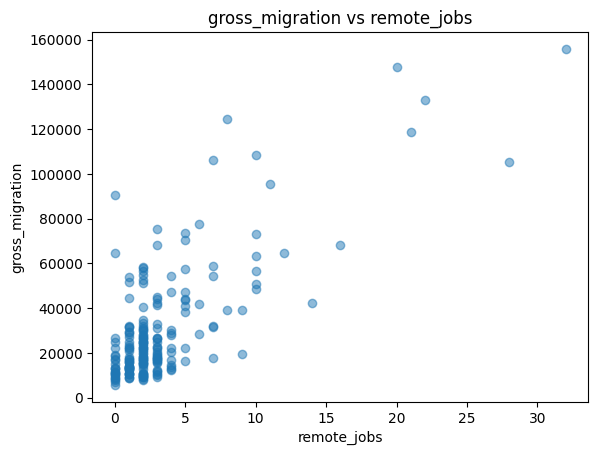

In [12]:
import matplotlib.pyplot as plt

pairs = [
    ("remote_share", "net_migration"),
    ("remote_share", "gross_migration"),
    ("remote_jobs", "net_migration"),
    ("remote_jobs", "gross_migration"),
]

for x_col, y_col in pairs:
    plt.figure()
    plt.scatter(eda[x_col], eda[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.show()


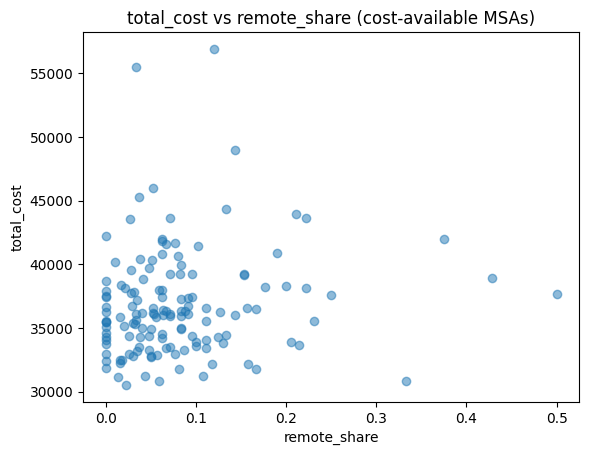

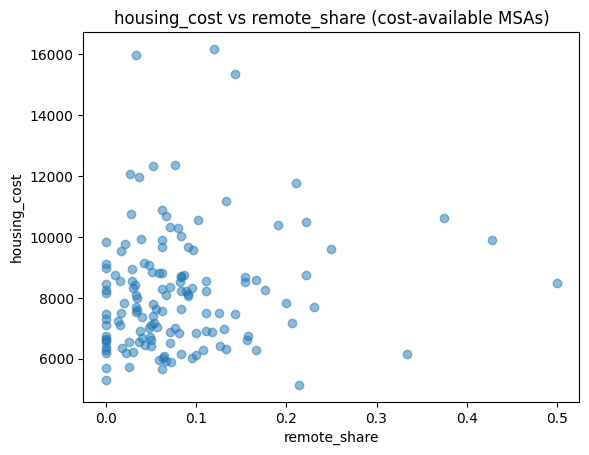

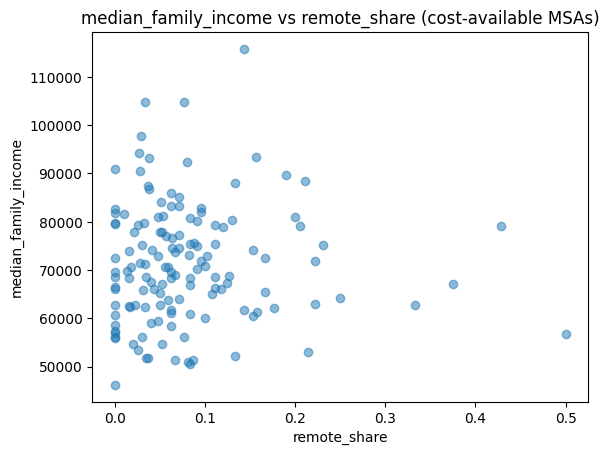

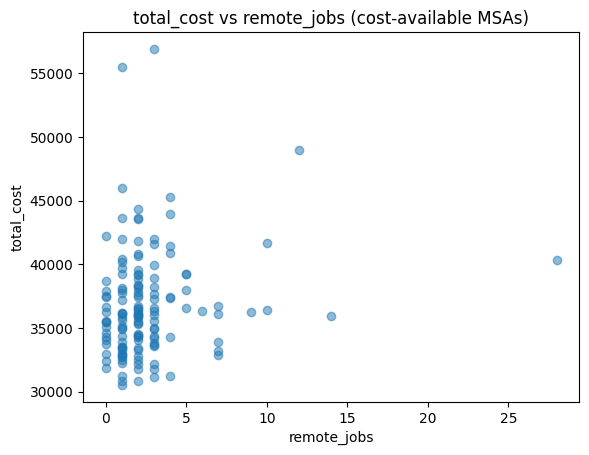

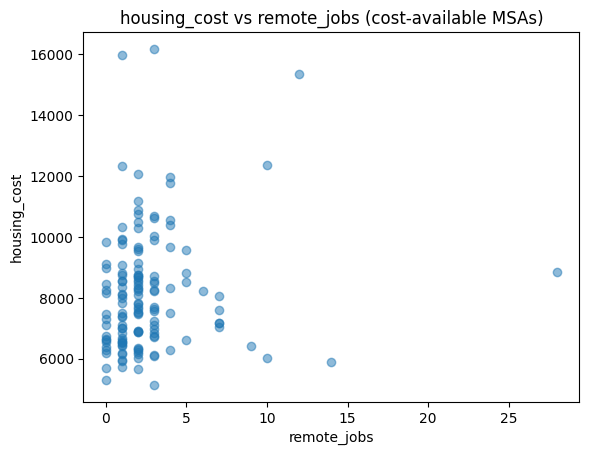

In [13]:
# Cost-available subset
cost_df = eda.dropna(subset=["total_cost"])

pairs = [
    ("remote_share", "total_cost"),
    ("remote_share", "housing_cost"),
    ("remote_share", "median_family_income"),
    ("remote_jobs", "total_cost"),
    ("remote_jobs", "housing_cost"),
]

for x_col, y_col in pairs:
    plt.figure()
    plt.scatter(cost_df[x_col], cost_df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col} (cost-available MSAs)")
    plt.show()


Snapshot month: 2024-04-01 00:00:00
Snapshot rows: 139


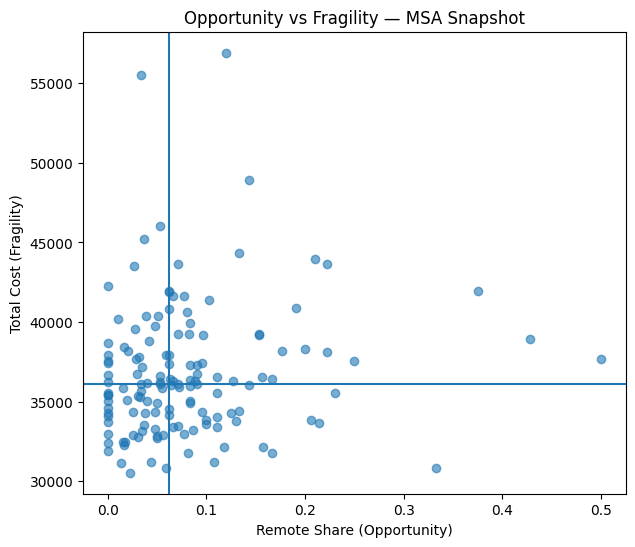

In [14]:
# Use cost-available MSAs only
cost_df = eda.dropna(subset=["total_cost"]).copy()

# Pick latest month in data
latest_month = cost_df["year_month"].max()
snap = cost_df[cost_df["year_month"] == latest_month].copy()

print("Snapshot month:", latest_month)
print("Snapshot rows:", snap.shape[0])

# Axes
x = snap["remote_share"]
y = snap["total_cost"]

# Medians for quadrant split
x_med = x.median()
y_med = y.median()

plt.figure(figsize=(7, 6))
plt.scatter(x, y, alpha=0.6)

plt.axvline(x_med)
plt.axhline(y_med)

plt.xlabel("Remote Share (Opportunity)")
plt.ylabel("Total Cost (Fragility)")
plt.title("Opportunity vs Fragility — MSA Snapshot")

plt.show()


Opportunity vs Fragility (EDA Summary)

This figure plots remote job demand intensity against cost-of-living pressure across U.S. Metropolitan Statistical Areas (MSAs).

The x-axis uses remote share, defined as the proportion of job postings in an MSA that are remote. This normalized measure enables comparison across MSAs of different sizes and reflects employer-side demand for remote-capable labor rather than workforce composition.

The y-axis uses total annual cost of living for a standardized household (1 person, 0 children), aggregating housing, food, transportation, healthcare, other necessities, and taxes. This variable captures structural economic pressure through absolute cost levels, without normalization.

Each point represents one MSA in a single month, with all datasets aligned at the MSA level and constrained to one observation per MSA × month. Only MSAs with available cost-of-living data are shown.

Median reference lines divide the plot into quadrants for interpretive clarity. These medians are used for classification only and do not imply rankings or causal thresholds.

Overall, the figure provides a non-causal snapshot of how remote work opportunity and economic fragility coexist across metropolitan areas, highlighting persistent heterogeneity rather than convergence.

Remote Work Demand and Migration — Key Insight

The scatter plot reveals a weak and highly dispersed relationship between remote job demand intensity (remote_share) and net migration across MSAs. While remote job exposure varies substantially across cities, migration outcomes remain tightly clustered around zero for most MSAs, indicating that remote opportunity alone is not a dominant driver of population movement. Several high–remote-share MSAs exhibit neutral or negative net migration, suggesting that economic constraints and place-based factors likely mediate mobility responses. Overall, the figure highlights a decoupling between labor demand structure and migration behavior, reinforcing that remote work expands job access without uniformly reshaping residential location patterns.

In [15]:
# Select features for clustering
cluster_features = [
    "city_state",
    "remote_share",
    "total_cost",
    "net_migration",
    "median_family_income"
]

cluster_df = eda[cluster_features].dropna().copy()

print("Clustering dataset shape:", cluster_df.shape)
cluster_df.head()


Clustering dataset shape: (139, 5)


,city_state,remote_share,total_cost,net_migration,median_family_income
0,"abilene, tx",0.050000,34924.3476,1360,65228.097656
1,"akron, oh",0.056452,32894.5836,-826,77102.312500
2,"albany, ga",0.214286,33677.2236,-725,52946.230469
3,"albuquerque, nm",0.013699,31145.3964,-3958,69691.710938
4,"alexandria, la",0.025641,34334.3580,361,53466.832031


In [16]:
from sklearn.preprocessing import StandardScaler

# Features only (exclude city_state)
X = cluster_df.drop(columns=["city_state"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix shape:", X_scaled.shape)
X_scaled[:5]


Scaled feature matrix shape: (139, 4)


array([[-0.37860489, -0.44106524,  0.13458633, -0.4986075 ],
       [-0.29916319, -0.92764131, -0.5868114 ,  0.47110142],
       [ 1.6443214 , -0.74002644, -0.55348058, -1.50160738],
       [-0.82560052, -1.34695736, -1.62039681, -0.13408608],
       [-0.67854826, -0.58249785, -0.19509177, -1.4590924 ]])

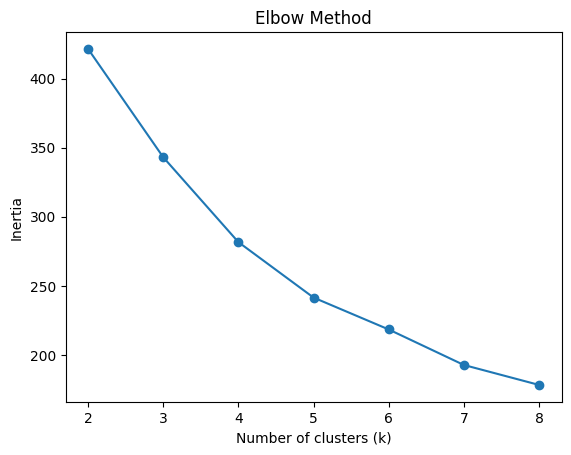

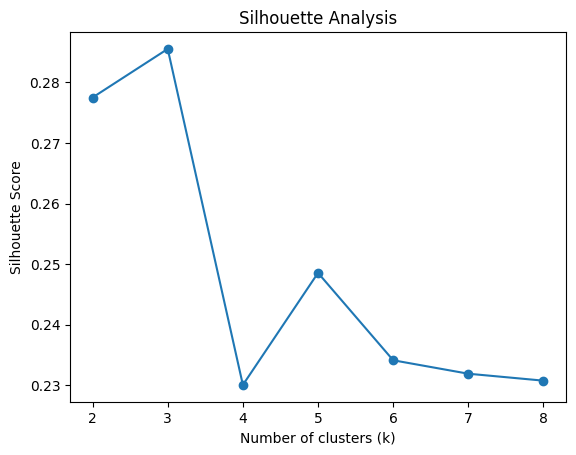

k=2, silhouette=0.278
k=3, silhouette=0.286
k=4, silhouette=0.230
k=5, silhouette=0.249
k=6, silhouette=0.234
k=7, silhouette=0.232
k=8, silhouette=0.231


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plot Elbow
plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(k_values, silhouettes, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# Print scores
for k, s in zip(k_values, silhouettes):
    print(f"k={k}, silhouette={s:.3f}")


In [18]:
# Fit final k-means model
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Attach cluster labels
cluster_df["cluster"] = cluster_labels

print(cluster_df["cluster"].value_counts().sort_index())
cluster_df.head()


cluster
0    86
1    14
2    39
Name: count, dtype: int64


,city_state,remote_share,total_cost,net_migration,median_family_income,cluster
0,"abilene, tx",0.050000,34924.3476,1360,65228.097656,0
1,"akron, oh",0.056452,32894.5836,-826,77102.312500,0
2,"albany, ga",0.214286,33677.2236,-725,52946.230469,1
3,"albuquerque, nm",0.013699,31145.3964,-3958,69691.710938,0
4,"alexandria, la",0.025641,34334.3580,361,53466.832031,0


In [19]:
# Cluster-level summary (means)
cluster_summary = (
    cluster_df
    .groupby("cluster")[[
        "remote_share",
        "total_cost",
        "net_migration",
        "median_family_income"
    ]]
    .mean()
    .round(2)
)

cluster_summary


,remote_share,total_cost,net_migration,median_family_income
cluster,,,,
0,0.05,34864.16,58.70,66494.76
1,0.26,37431.40,354.86,67714.34
2,0.07,40714.73,3136.82,83303.13


Cluster Interpretation — City Typologies

Based on k-means clustering (k = 3) using remote work intensity, cost pressure, migration outcomes, and income levels, three distinct metropolitan archetypes emerge.

Cluster 0 — Baseline / Stagnant MSAs (n = 86)

This cluster represents the majority of MSAs and serves as the structural baseline. These cities exhibit low remote job intensity (mean remote share ≈ 5%), moderate cost of living, and near-zero net migration, indicating limited population dynamism. Median family income is comparatively lower than other clusters. Economically, these MSAs appear stable but stagnant, neither strongly attracting nor losing population, and show limited exposure to remote work opportunities.

Cluster 1 — High Remote Opportunity, Moderate Pressure MSAs (n = 14)

Cities in this cluster stand out for their very high remote job intensity (mean remote share ≈ 26%), far exceeding all other groups. While cost of living is somewhat elevated, it remains below the most expensive cluster. Net migration is modestly positive, suggesting that remote opportunity alone generates some population inflow, but not at large scale. These MSAs resemble emerging remote-work hubs, where job structure is shifting faster than population patterns.

Cluster 2 — High-Cost, High-Income Migration Attractors (n = 39)

This cluster is characterized by the highest cost of living and highest median family income, alongside strong positive net migration. Remote job intensity is only moderate, implying that migration into these cities is driven by broader economic advantages rather than remote work alone. These MSAs function as traditional economic attractors, where income opportunities offset higher living costs.

Structural Insight

Taken together, the clusters indicate that remote work exposure, affordability, and migration do not move in lockstep. High remote job intensity does not guarantee strong in-migration, and the largest migration gains occur in high-income, high-cost cities with only moderate remote exposure. This reinforces the view that remote work expands labor access but does not override entrenched economic and geographic forces.

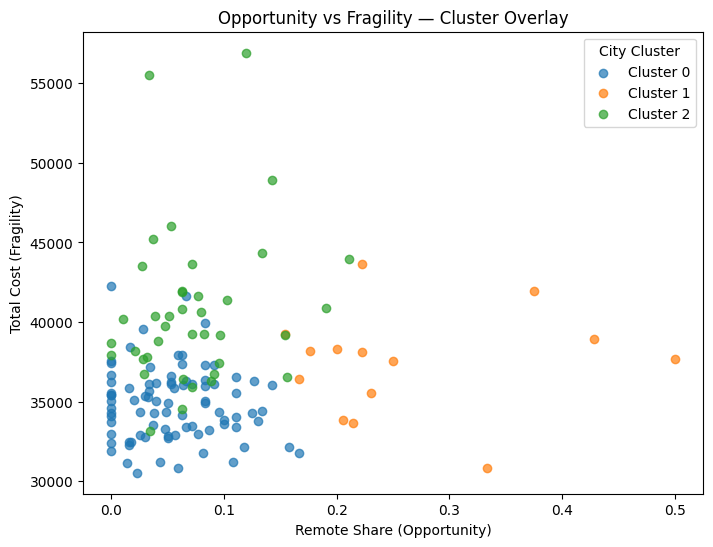

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for c in sorted(cluster_df["cluster"].unique()):
    subset = cluster_df[cluster_df["cluster"] == c]
    plt.scatter(
        subset["remote_share"],
        subset["total_cost"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("Remote Share (Opportunity)")
plt.ylabel("Total Cost (Fragility)")
plt.title("Opportunity vs Fragility — Cluster Overlay")
plt.legend(title="City Cluster")
plt.show()


Opportunity vs Fragility — Cluster Overlay (Model Validation)

The cluster overlay confirms that the k-means model is capturing real economic structure rather than arbitrary partitions. Cluster 1 (orange) is clearly separated along the x-axis, occupying the far-right region of high remote job intensity, validating its interpretation as high remote opportunity MSAs. Cluster 2 (green) concentrates at higher total cost levels on the y-axis, with moderate remote exposure, consistent with high-cost, high-income migration attractors driven by broader economic forces rather than remote work alone. Cluster 0 (blue) forms a dense central mass with low remote share and moderate costs, representing baseline or stagnant MSAs with limited exposure to remote labor markets and weak migration signals. The clear spatial separation across opportunity and cost dimensions demonstrates that clustering formalizes patterns already observed in EDA, strengthening the credibility and interpretability of the modeling results.

In [21]:
# Sort within each cluster by remote_share
examples_by_cluster = (
    cluster_df
    .sort_values("remote_share", ascending=False)
    .groupby("cluster")
    .head(5)[[
        "city_state",
        "remote_share",
        "total_cost",
        "net_migration",
        "median_family_income",
        "cluster"
    ]]
)

examples_by_cluster


,city_state,remote_share,total_cost,net_migration,median_family_income,cluster
54,"el centro, ca",0.500000,37678.6080,-2763,56738.300781,1
52,"east stroudsburg, pa",0.428571,38910.4800,1811,79168.289062,1
207,"yuba city, ca",0.375000,41979.1056,578,67039.421875,1
16,"bay city, mi",0.333333,30831.4428,429,62841.753906,1
151,"punta gorda, fl",0.250000,37548.4248,5582,64146.851562,1
89,"ithaca, ny",0.210526,43952.5668,4440,88545.265625,2
178,"state college, pa",0.190476,40880.2356,7372,89726.117188,2
97,"johnstown, pa",0.166667,31771.1340,473,65347.210938,0
135,"muncie, in",0.157895,32139.9576,3801,61300.488281,0
174,"springfield, il",0.156250,36560.0388,-1603,93451.437500,2


Representative MSAs by Cluster
Cluster 1 — High Remote Opportunity, Moderate Cost (Emerging Remote Hubs)

MSAs in this cluster exhibit exceptionally high remote job intensity, often far above the national norm, while maintaining moderate cost levels and mixed migration outcomes.

Representative examples include El Centro, CA, East Stroudsburg, PA, Yuba City, CA, Bay City, MI, and Punta Gorda, FL. These cities show that remote work exposure can rise sharply even outside traditional tech or high-income metros. Migration signals are inconsistent—some MSAs experience net inflows while others do not—suggesting that remote job availability alone is not sufficient to guarantee population growth, but may position these cities as emerging remote-oriented locations.

Cluster 2 — High-Cost, High-Income Migration Attractors

This cluster contains MSAs with elevated living costs and high median family incomes, alongside strong positive net migration, despite only moderate remote job intensity.

Examples such as Ithaca, NY, State College, PA, Harrisonburg, VA, Boulder, CO, and Springfield, IL illustrate cities where migration appears driven by broader economic, educational, or institutional advantages, rather than remote work alone. These MSAs function as established attractors, where income opportunities and amenities offset higher costs.

Cluster 0 — Baseline / Transitional MSAs

Cluster 0 represents MSAs with lower remote job exposure, moderate to low costs, and heterogeneous migration outcomes, forming the structural baseline of the dataset.

Cities such as Johnstown, PA, Muncie, IN, and Rome, GA fall into this group. While some MSAs show pockets of positive migration, overall these cities exhibit limited engagement with remote labor markets and weaker, less consistent population dynamics.

Key Takeaway from MSA Examples

Across clusters, the examples reinforce that remote work opportunity, affordability, and migration operate on partially independent axes. High remote exposure can emerge in relatively small or affordable MSAs, while the strongest migration gains continue to concentrate in high-income, high-cost cities. This heterogeneity underscores why clustering—rather than ranking or prediction—is the appropriate analytical lens for this project.

In [27]:
import pandas as pd
import plotly.express as px
import numpy as np

# -----------------------------
# Hard-coded US state centroids
# -----------------------------
state_centroids = {
    "AL": (32.806671, -86.791130),
    "AK": (61.370716, -152.404419),
    "AZ": (33.729759, -111.431221),
    "AR": (34.969704, -92.373123),
    "CA": (36.116203, -119.681564),
    "CO": (39.059811, -105.311104),
    "CT": (41.597782, -72.755371),
    "DE": (39.318523, -75.507141),
    "FL": (27.766279, -81.686783),
    "GA": (33.040619, -83.643074),
    "HI": (21.094318, -157.498337),
    "ID": (44.240459, -114.478828),
    "IL": (40.349457, -88.986137),
    "IN": (39.849426, -86.258278),
    "IA": (42.011539, -93.210526),
    "KS": (38.526600, -96.726486),
    "KY": (37.668140, -84.670067),
    "LA": (31.169546, -91.867805),
    "ME": (44.693947, -69.381927),
    "MD": (39.063946, -76.802101),
    "MA": (42.230171, -71.530106),
    "MI": (43.326618, -84.536095),
    "MN": (45.694454, -93.900192),
    "MS": (32.741646, -89.678696),
    "MO": (38.456085, -92.288368),
    "MT": (46.921925, -110.454353),
    "NE": (41.125370, -98.268082),
    "NV": (38.313515, -117.055374),
    "NH": (43.452492, -71.563896),
    "NJ": (40.298904, -74.521011),
    "NM": (34.840515, -106.248482),
    "NY": (42.165726, -74.948051),
    "NC": (35.630066, -79.806419),
    "ND": (47.528912, -99.784012),
    "OH": (40.388783, -82.764915),
    "OK": (35.565342, -96.928917),
    "OR": (44.572021, -122.070938),
    "PA": (40.590752, -77.209755),
    "RI": (41.680893, -71.511780),
    "SC": (33.856892, -80.945007),
    "SD": (44.299782, -99.438828),
    "TN": (35.747845, -86.692345),
    "TX": (31.054487, -97.563461),
    "UT": (40.150032, -111.862434),
    "VT": (44.045876, -72.710686),
    "VA": (37.769337, -78.169968),
    "WA": (47.400902, -121.490494),
    "WV": (38.491226, -80.954453),
    "WI": (44.268543, -89.616508),
    "WY": (42.755966, -107.302490),
}

# -----------------------------
# Prepare cluster data
# -----------------------------
map_df = cluster_df.copy()

map_df["state"] = map_df["city_state"].str.split(",").str[1].str.strip().str.upper()

map_df["lat"] = map_df["state"].map(lambda x: state_centroids.get(x, (None, None))[0])
map_df["lon"] = map_df["state"].map(lambda x: state_centroids.get(x, (None, None))[1])

map_df = map_df.dropna(subset=["lat", "lon"])

# Jitter to avoid overlap
np.random.seed(42)
map_df["lat"] += np.random.normal(0, 0.3, len(map_df))
map_df["lon"] += np.random.normal(0, 0.3, len(map_df))

print("MSAs plotted:", map_df.shape[0])

# -----------------------------
# Plot
# -----------------------------
fig = px.scatter_geo(
    map_df,
    lat="lat",
    lon="lon",
    color="cluster",
    size="remote_share",
    hover_name="city_state",
    hover_data={
        "remote_share": ":.2f",
        "total_cost": ":.0f",
        "net_migration": True,
        "median_family_income": ":.0f",
    },
    scope="usa",
    title="US Metropolitan Areas by Remote Work–Migration Cluster",
    size_max=28,
    color_discrete_map={
        0: "#1f77b4",
        1: "#ff7f0e",
        2: "#2ca02c"
    }
)

fig.update_layout(
    legend_title_text="Cluster",
    geo=dict(
        showland=True,
        landcolor="rgb(245,245,245)"
    )
)

fig.show()


MSAs plotted: 139


Figure: US Metropolitan Areas by Remote Work–Migration Cluster

This figure maps U.S. metropolitan areas by cluster membership derived from remote job intensity, cost of living, and net migration patterns. Marker size reflects the share of remote job postings, while color indicates structural city typology. Metropolitan locations are approximated using state centroids with jitter to emphasize regional clustering patterns rather than precise geographic boundaries.

Key Spatial Patterns

The spatial distribution of clusters reveals that remote work opportunity is geographically dispersed, appearing across interior and secondary metropolitan regions rather than concentrating solely in coastal or traditionally high-cost areas. In contrast, high-cost, high-income migration attractors remain regionally concentrated, particularly in parts of the Northeast corridor and select western metros, indicating that income and institutional factors continue to anchor population flows.

Baseline MSAs dominate large portions of the Midwest and South, reflecting limited exposure to remote job demand and weaker migration dynamics. Taken together, the map demonstrates that while remote work broadens access to employment opportunities across space, it does not eliminate underlying geographic and economic structure in U.S. urban systems.